<a href="https://colab.research.google.com/github/BjorkMagno/Portafolio/blob/main/data-science/desafios/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='purple'>Lectura de datos</h1>

In [1]:
import pandas as pd

In [4]:
datos = pd.read_csv('/content/diabetes.csv')

In [5]:
datos.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


## <font color='purple'> Variables explicativas y variable objetivo</h1>

In [8]:
x = datos.drop('diabetes', axis = 1)
y = datos['diabetes']

2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x, x_prueba, y, y_prueba = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify = y, random_state = 5)

La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [14]:
arbol.fit(x_train, y_train)
print(f'Precisión de entrenamiento: {arbol.score(x_train, y_train)}')
print(f'Precisión de prueba: {arbol.score(x_val, y_val)}')

Precisión de entrenamiento: 0.7593984962406015
Precisión de prueba: 0.550561797752809


La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

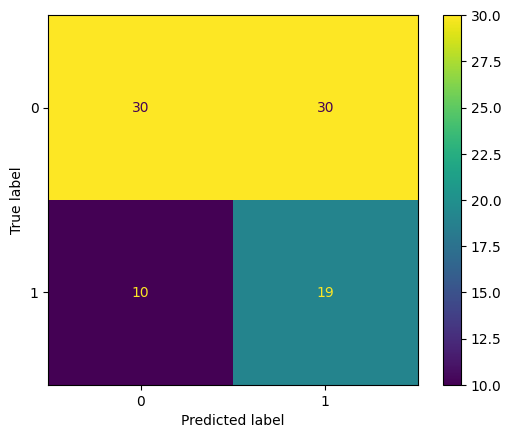

In [16]:
prediccion_arbol = arbol.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

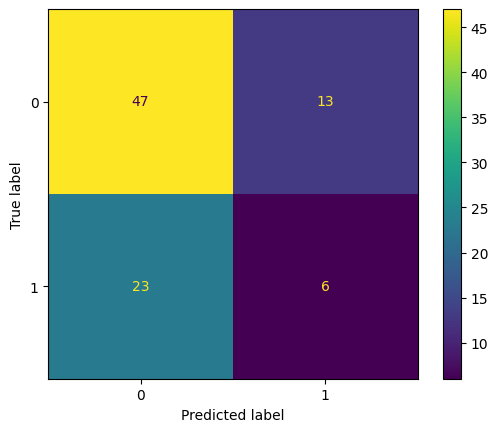

In [24]:
prediccion_rf = random_forest.fit(x_train, y_train).predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);